<a href="https://colab.research.google.com/github/hyunwjang/deep/blob/main/_6_1_%EC%BC%80%EB%9D%BC%EC%8A%A4_CNN_Fashion_MNIST_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 CNN Fashion MNIST

#### module import

In [ ]:
import tensorflow as tf
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

### 데이터 로드 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal','Shirt', 'Sneaker', 'Bag','Ankle boot']


### 모델 구성 및 컴파일
- 임의의 모델

In [ ]:
def build_model():
  model = Sequential()

  input = Input(shape = ( 28,28, 1))
  output = Conv2D(filters = 32, kernel_size=(3,3))(input)
  output = Conv2D(filters = 64, kernel_size = (3,3))(output)
  output = Conv2D(filters = 64, kernel_size = (3,3))(output)
  output = Flatten()(output)
  output = Dense(units = 128, activation = 'relu')(output)
  output = Dense(units = 64, activation = 'relu')(output)
  output = Dense(units = 10, activation = 'softmax')(output)

  model = Model(inputs =[input], outputs = output)

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  return model

model_1 = build_model()
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 64)                8256  

### 모델 학습
- 런타임 GPU로 설정

In [ ]:
hist_1 = model_1.fit(x_train,y_train, epochs = 30,
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/30
329/329 [==============================] - 13s 15ms/step - loss: 0.5272 - acc: 0.8107 - val_loss: 0.4140 - val_acc: 0.8472
Epoch 2/30
329/329 [==============================] - 5s 15ms/step - loss: 0.3460 - acc: 0.8721 - val_loss: 0.3654 - val_acc: 0.8701
Epoch 3/30
329/329 [==============================] - 4s 13ms/step - loss: 0.2958 - acc: 0.8901 - val_loss: 0.3437 - val_acc: 0.8761
Epoch 4/30
329/329 [==============================] - 4s 13ms/step - loss: 0.2472 - acc: 0.9081 - val_loss: 0.3699 - val_acc: 0.8709
Epoch 5/30
329/329 [==============================] - 5s 15ms/step - loss: 0.2139 - acc: 0.9207 - val_loss: 0.3943 - val_acc: 0.8722
Epoch 6/30
329/329 [==============================] - 5s 15ms/step - loss: 0.1894 - acc: 0.9282 - val_loss: 0.4217 - val_acc: 0.8681
Epoch 7/30
329/329 [==============================] - 4s 14ms/step - loss: 0.1710 - acc: 0.9355 - val_loss: 0.4913 - val_acc: 0.8642
Epoch 8/30
329/329 [==============================] - 4s 13ms/step -

### 학습 결과 시각화

In [ ]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

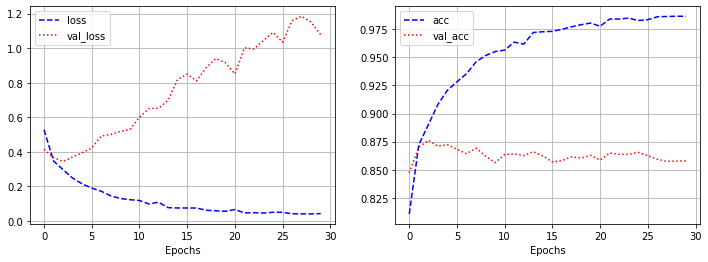

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'], 'b--', label = 'loss')
plt.plot(hist_1.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['acc'], 'b--', label = 'acc')
plt.plot(hist_1.history['val_acc'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()


### 모델 평가

In [ ]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0755 - acc: 0.8552


[1.0754952430725098, 0.8551999926567078]

### 모델 재구성
- 학습 파라미터의 수 비교

In [ ]:
def build_model2():
  model = Sequential()

  input = Input(shape = ( 28,28, 1))
  output = Conv2D(filters = 32, kernel_size=(3,3))(input)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters = 64, kernel_size = (3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters = 64, kernel_size = (3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(units = 128, activation = 'relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units = 64, activation = 'relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units = 10, activation = 'softmax')(output)

  model = Model(inputs =[input], outputs = output)

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  return model

model_2 = build_model2()
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          3692

### 모델 재학습

In [ ]:
hist_2 = model_2.fit(x_train,y_train, epochs = 30,
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.9003 - acc: 0.6689 - val_loss: 0.5674 - val_acc: 0.7911
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.5820 - acc: 0.7861 - val_loss: 0.5015 - val_acc: 0.8170
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.5107 - acc: 0.8136 - val_loss: 0.4756 - val_acc: 0.8219
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4619 - acc: 0.8324 - val_loss: 0.4096 - val_acc: 0.8463
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4152 - acc: 0.8494 - val_loss: 0.3800 - val_acc: 0.8606
Epoch 6/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3890 - acc: 0.8595 - val_loss: 0.3762 - val_acc: 0.8630
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3611 - acc: 0.8710 - val_loss: 0.3821 - val_acc: 0.8603
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0.

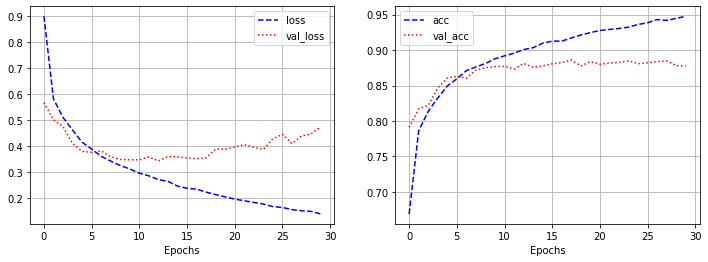

In [ ]:
hist_2.history.keys()
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'], 'b--', label = 'loss')
plt.plot(hist_2.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['acc'], 'b--', label = 'acc')
plt.plot(hist_2.history['val_acc'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()


### 모델 재평가

In [ ]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4826 - acc: 0.8739


[0.4825592339038849, 0.8738999962806702]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [ ]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [ ]:
def build_model3():
  model = Sequential()

  input = Input(shape = (28,28, 1))
  output = Conv2D(filters = 32, kernel_size=3, activation= 'relu', padding= 'same')(input)
  output = Conv2D(filters = 64, kernel_size=3, activation= 'relu', padding= 'valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Conv2D(filters = 128, kernel_size=3, activation= 'relu', padding= 'same')(output)
  output = Conv2D(filters = 256, kernel_size=3, activation= 'relu', padding= 'valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(units = 256, activation = 'relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units = 100, activation = 'relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units = 10, activation = 'softmax')(output)

  model = Model(inputs =[input], outputs = output)

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  return model

model_3 = build_model2()
model_3.summary()

NameError: ignored

## 모델 학습 및 결과 시각화

In [ ]:
hist_3 = model_3.fit(x_train,y_train, epochs = 30,
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.9165 - acc: 0.6688 - val_loss: 0.5713 - val_acc: 0.7828
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.5795 - acc: 0.7936 - val_loss: 0.4821 - val_acc: 0.8232
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4915 - acc: 0.8250 - val_loss: 0.4291 - val_acc: 0.8436
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.4413 - acc: 0.8420 - val_loss: 0.4127 - val_acc: 0.8471
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.4083 - acc: 0.8522 - val_loss: 0.3945 - val_acc: 0.8577
Epoch 6/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3817 - acc: 0.8617 - val_loss: 0.3684 - val_acc: 0.8657
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3564 - acc: 0.8718 - val_loss: 0.3642 - val_acc: 0.8677
Epoch 8/30
329/329 [==============================] - 2s 7ms/step - loss: 0.

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

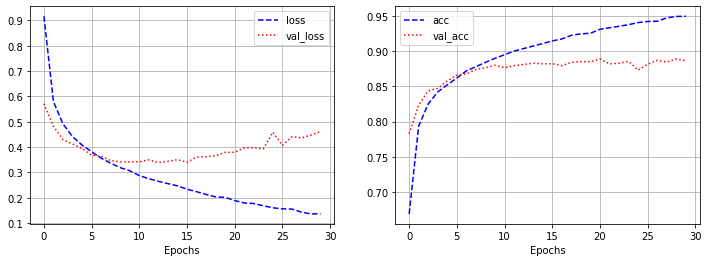

In [ ]:
hist_3.history.keys()
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(hist_3.history['loss'], 'b--', label = 'loss')
plt.plot(hist_3.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_3.history['acc'], 'b--', label = 'acc')
plt.plot(hist_3.history['val_acc'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

In [ ]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4779 - acc: 0.8850


[0.477855384349823, 0.8849999904632568]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.2,
    shear_range = 0.6,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

In [ ]:
augment_size = 200

In [ ]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1,28,28,1),
                                 np.zeros(augment_size),batch_size = augment_size, shuffle = False).next()[0]

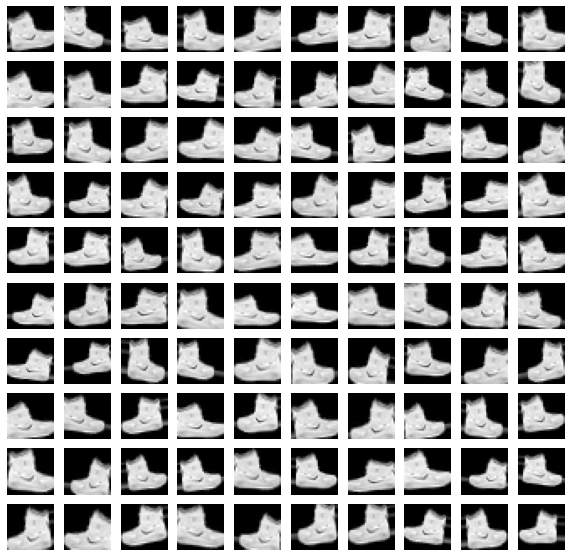

In [ ]:
plt.figure(figsize =(10,10))
for i in range(1,101):
  plt.subplot(10,10,i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28), cmap = 'gray')

데이터 추가

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 15,
    zoom_range = 0.1,
    shear_range = 0.6,
    width_shift_range = 0.15,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

In [ ]:
augment_size = 30000

In [ ]:
random_mask = np.random.randint(x_train.shape[0], size = augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size = augment_size, shuffle = False).next()[0]
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(120000, 28, 28, 1)
(120000,)


## 모델 학습 및 결과 시각화

In [ ]:
model_4 = build_model3()
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                             

In [ ]:
hist_4 = model_4.fit(x_train,y_train,
                     epochs = 25
                     ,validation_split = 0.3,
                     batch_size = 128)

Epoch 1/25
657/657 [==============================] - 14s 21ms/step - loss: 0.2937 - acc: 0.8945 - val_loss: 0.5761 - val_acc: 0.7933
Epoch 2/25
657/657 [==============================] - 14s 21ms/step - loss: 0.2922 - acc: 0.8952 - val_loss: 0.5948 - val_acc: 0.7849
Epoch 3/25
657/657 [==============================] - 14s 22ms/step - loss: 0.2904 - acc: 0.8956 - val_loss: 0.5722 - val_acc: 0.7958
Epoch 4/25
657/657 [==============================] - 13s 20ms/step - loss: 0.2867 - acc: 0.8964 - val_loss: 0.5727 - val_acc: 0.7993
Epoch 5/25
657/657 [==============================] - 13s 20ms/step - loss: 0.2857 - acc: 0.8987 - val_loss: 0.5773 - val_acc: 0.7937
Epoch 6/25
657/657 [==============================] - 14s 21ms/step - loss: 0.2801 - acc: 0.8998 - val_loss: 0.5670 - val_acc: 0.8027
Epoch 7/25
657/657 [==============================] - 13s 20ms/step - loss: 0.2786 - acc: 0.8991 - val_loss: 0.5825 - val_acc: 0.7957
Epoch 8/25
657/657 [==============================] - 14s 21ms

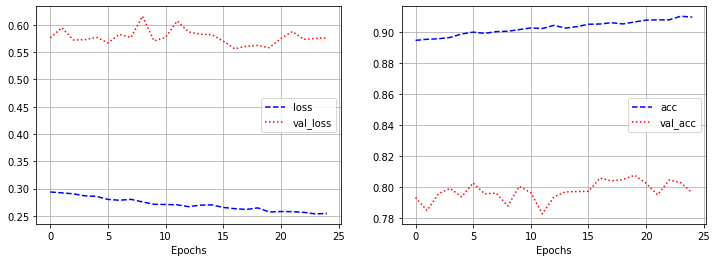

In [ ]:
hist_4.history.keys()
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(hist_4.history['loss'], 'b--', label = 'loss')
plt.plot(hist_4.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_4.history['acc'], 'b--', label = 'acc')
plt.plot(hist_4.history['val_acc'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [ ]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1975 - acc: 0.9304


[0.19754108786582947, 0.930400013923645]